this application uses the LSTM Model from deep learning and it's based for closing price of the stock

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pandas_datareader as data
import yfinance as yf


In [14]:
start = '2012-01-01'
end = '2023-12-22'
stock = 'GOOG'

df = yf.download(stock, start=start, end=end)

df.head()



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


In [15]:
df = df.reset_index()  #reset index
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


In [16]:
df = df.drop(['Date', 'Adj Close'], axis=1)  #drop columns
df.head()


,Open,High,Low,Close,Volume
0,16.262545,16.641375,16.248346,16.573130,147611217
1,16.563665,16.693678,16.453827,16.644611,114989399
2,16.491436,16.537264,16.344486,16.413727,131808205
3,16.417213,16.438385,16.184088,16.189817,108119746
4,16.102144,16.114599,15.472754,15.503389,233776981


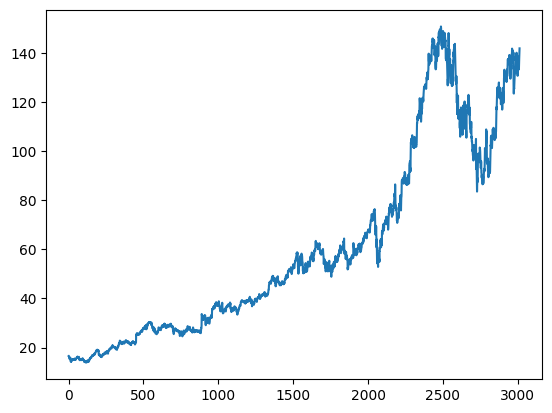

In [20]:
plt.plot(df.Close) #graph showing the closing price of the stock

In [21]:
ma100 = df.Close.rolling(100).mean()  #100 day moving average will be calculated the closing price of the stock and plotted on the graph
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3008    133.9859
3009    134.0591
3010    134.1100
3011    134.1755
3012    134.2746
Name: Close, Length: 3013, dtype: float64

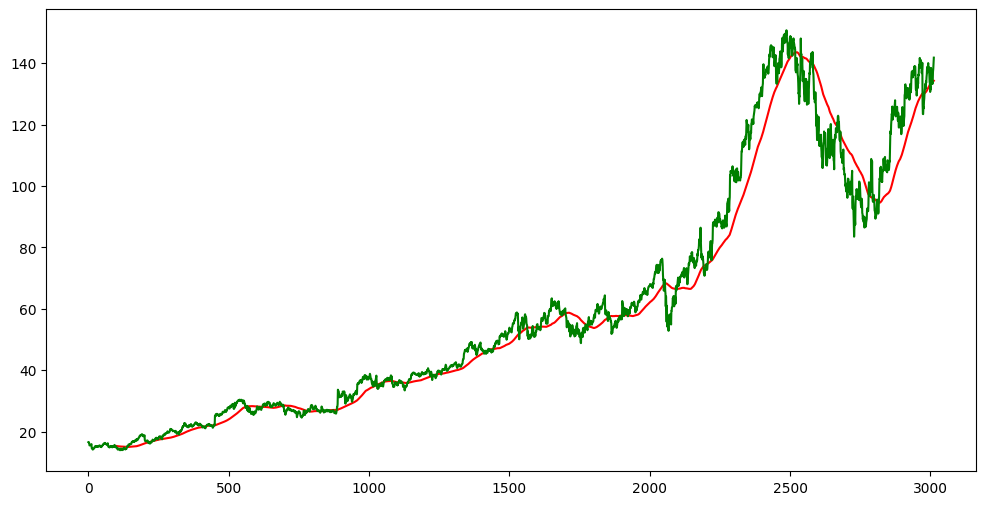

In [22]:
plt.figure(figsize=(12,6))
plt.plot(ma100, 'r')
plt.plot(df.Close, 'g')
plt.show()

In [23]:
ma200 = df.Close.rolling(200).mean()  #200 day moving average will be calculated the closing price of the stock and plotted on the graph
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3008    123.672575
3009    123.888425
3010    124.101025
3011    124.328475
3012    124.564225
Name: Close, Length: 3013, dtype: float64

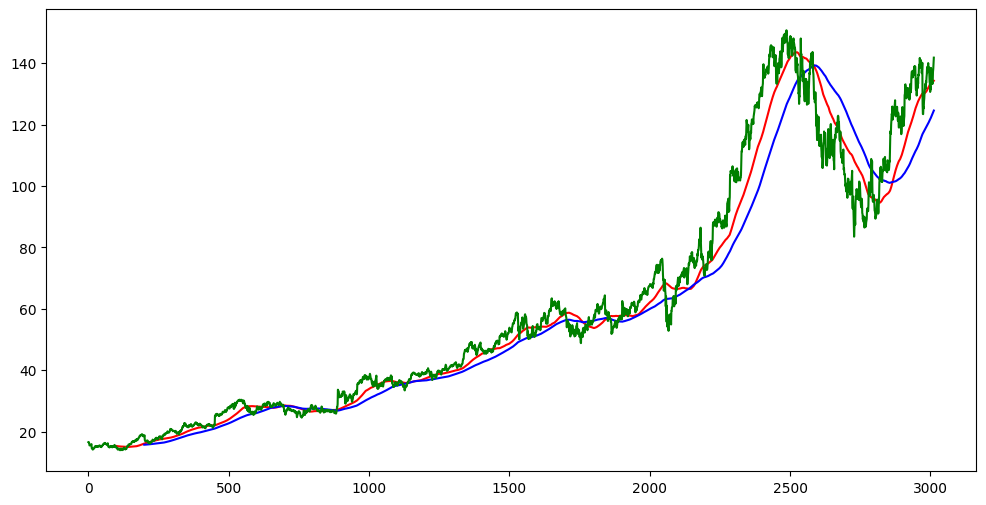

In [24]:
plt.figure(figsize=(12,6))
plt.plot(ma100, 'r')
plt.plot(ma200,'b')
plt.plot(df.Close,'g')
plt.show()

In [26]:
df.shape

(3013, 5)

## splitting the into training set and testing set 

In [27]:
data_training = pd.DataFrame(df.Close[0: int(len(df)*0.70)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.70): len(df)])

In [28]:
print(data_training.shape)
print(data_testing.shape)

(2109, 1)
(904, 1)


# stack lstm model we need to scale the data to 0-1

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [30]:
data_training_array = scaler.fit_transform(data_training)

In [31]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])   #100 values will be stored in x_train
    y_train.append(data_training_array[i,0])      #101st value will be stored in y_train
    


In [33]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [35]:
x_train.shape, y_train.shape

((2009, 100, 1), (2009,))

## ML Model

In [34]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [36]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x_train.shape[1],1))))
model.add(Dropout(0.2)) 

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1)) #output layer prediction of the stock  closing price

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [39]:
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 227ms/step - loss: 0.0874
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - loss: 0.0090
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 222ms/step - loss: 0.0073
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - loss: 0.0069
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0056
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 215ms/step - loss: 0.0057
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 251ms/step - loss: 0.0054
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 233ms/step - loss: 0.0045
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 185ms/step - loss: 0.0046
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0044
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 215ms/step - loss: 0.0056
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 228ms/step - loss: 0.0050
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 216ms/step - loss: 0.0042
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 218ms/step - loss: 0.0053
Epoch 15/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 

In [40]:
model.save('stock_prediction.h5') #save the model for future use in streamlit web app

30% data is the testing data for pridictino we will use that data 

In [41]:
data_testing.head()

,Close
2109,70.139999
2110,70.521004
2111,70.850998
2112,70.891998
2113,70.836502


In [42]:
past_100_days = data_training.tail(100)

In [44]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [45]:
final_df.head()

,Close
0,67.594498
1,66.806999
2,66.850998
3,68.368500
4,68.032997


In [46]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.1508357 ],
       [0.14278999],
       [0.14323951],
       ...,
       [0.87117643],
       [0.88711461],
       [0.90897856]])

In [47]:
input_data.shape

(1004, 1)

In [48]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)


In [49]:
x_test.shape, y_test.shape

((904, 100, 1), (904,))

making Predictions

In [50]:
y_predictded = model.predict(x_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step


In [51]:
y_predictded.shape

(904, 1)

In [52]:
scaler.scale_  #factor by which the data was scaled

array([0.0102168])

In [53]:
scale_factor = 1/0.0102168
y_predictded = y_predictded*scale_factor
y_test = y_test*scale_factor


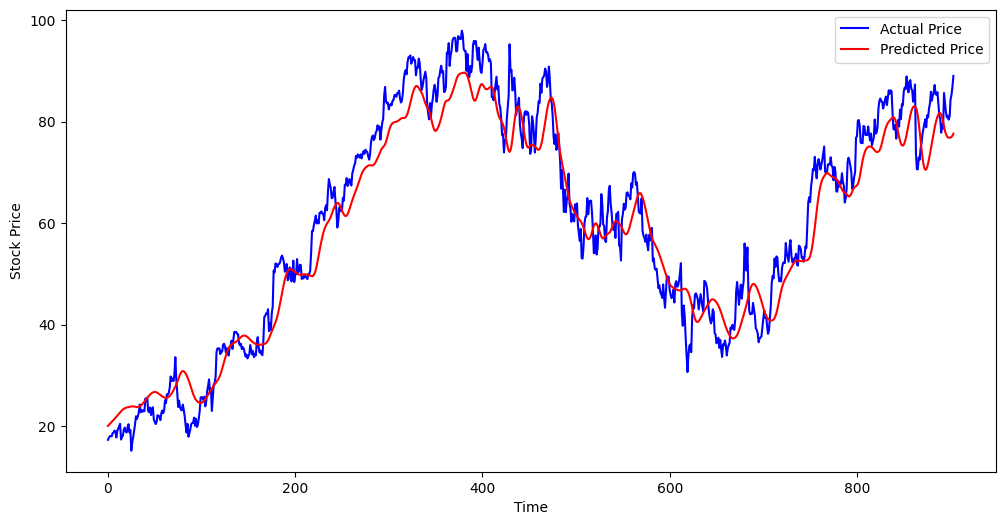

In [55]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Actual Price')
plt.plot(y_predictded, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
